# Global feedback for control of coupled Hopf oscillators

## 1. Phase-reduced model

In [2]:
import numpy as np
import seaborn as sbn
import Model as model
import Modelwithcontrol as model_c
import TurbulenceMeasures as TB
import importlib
import cmath
from scipy.fftpack import fft, ifft

In [21]:
importlib.reload(model)

<module 'Model' from '/home/nartallokalu/Desktop/turbulencecontrol/Model.py'>

In [22]:
importlib.reload(TB)

<module 'TurbulenceMeasures' from '/home/nartallokalu/Desktop/turbulencecontrol/TurbulenceMeasures.py'>

In [4]:
importlib.reload(model_c)

<module 'Modelwithcontrol' from '/home/nartallokalu/Desktop/turbulencecontrol/Modelwithcontrol.py'>

In [13]:
#Simulation parameters
#Model parameters
N=1000; T=1000; delta_x=0.1; beta=2.6; sigma=0.1; K=0.05
#Latent parameters
alpha = np.angle(complex(1,beta)); w=beta+1; D= (sigma/K)*np.sqrt(1+beta**2)
#Coupling function
def G(x):
    return 0.5*np.exp(-np.abs(x))
#Integration parameters
#phi_0 = np.random.uniform(low=0,high=2*np.pi,size=N)
phi_0=np.zeros(N)
num_points = 10000; t_0=0

In [18]:
sol,t = model.SolvePhaseHopfModel(phi_0,T,N,w,G,num_points,t_0,delta_x,alpha,D)
bounded_sol=np.mod(sol,2*np.pi)

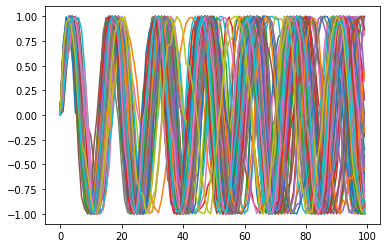

In [557]:
for j in range(0,100):
    sbn.lineplot(np.sin(sol[j,:]))

In [19]:
LKO_R,LKO_theta = TB.CalculateLocalKuramotoOrderParam(bounded_sol,G,delta_x)
#LKO_R_nofft,LKO_theta_nofft = TB.CalculateLocalKuramotoOrderParam(bounded_sol,G,delta_x)

<AxesSubplot: >

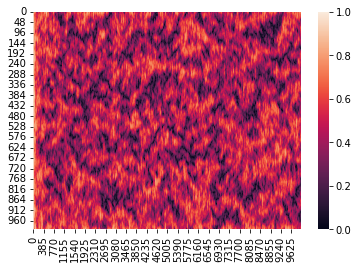

In [592]:
sbn.heatmap(LKO_R,vmin=0,vmax=1)

In [601]:
LKO_R,LKO_theta = TB.CalculateLocalKuramotoOrderParam(bounded_sol,G,delta_x)

<AxesSubplot: >

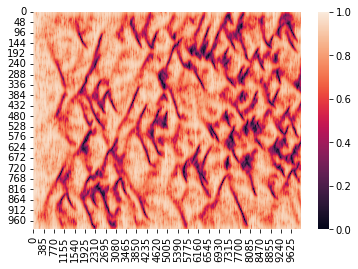

In [20]:
sbn.heatmap(LKO_R,vmin=0,vmax=1)

Really nice turbulence at beta=2.6; sigma=0.1

In [606]:
R, Theta = TB.CalculateGlobalKuramotoOrderParam(sol)

## Using a global feedback control

In [64]:
#Control param
mu = 0.2

#Simulation parameters
#Model parameters
N=1000; T=1000; delta_x=0.1; beta=2.6; sigma=0.1; K=0.05
#Latent parameters
alpha = np.angle(complex(1,beta)); w=beta+1; D= (sigma/K)*np.sqrt(1+beta**2)
#Coupling function
def G(x):
    return 0.5*np.exp(-np.abs(x))
#Integration parameters
#phi_0 = np.random.uniform(low=0,high=2*np.pi,size=N)
phi_0=np.zeros(N)
num_points = 10000; t_0=0

In [7]:
sol_c,t_c = model_c.SolvePhaseHopfModelControlled(phi_0,T,N,w,G,num_points,t_0,delta_x,alpha,D,mu)
bounded_sol_c=np.mod(sol_c,2*np.pi)

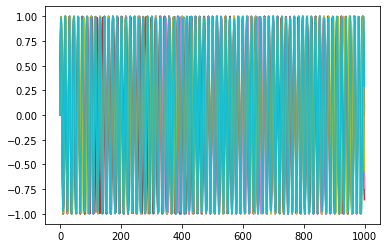

In [631]:
for j in range(0,10):
    sbn.lineplot(np.sin(sol_c[j,:]))

In [8]:
LKO_R_C,LKO_theta_C = TB.CalculateLocalKuramotoOrderParam(bounded_sol_c,G,delta_x)

<AxesSubplot: >

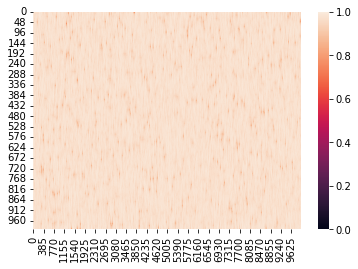

In [9]:
sbn.heatmap(LKO_R_C,vmin=0,vmax=1)

In [26]:
print(TB.CalculateVarianceLKOP(LKO_R))
print(TB.CalculateVarianceLKOP(LKO_R_C))

0.033344322109666126
0.00015991504369704406


I now want to sweep the parameter $\mu$ in order to see if there is a bifurcation point as in the other paper. 

In [83]:
#Control param
control_N = 50
mu = np.linspace(0,0.5,control_N)
Turbulence_measurements_under_control =np.zeros(control_N)
#Simulation parameters
#Model parameters
N=1000; T=1000; delta_x=0.1; beta=2.6; sigma=0.1; K=0.05
#Latent parameters
alpha = np.angle(complex(1,beta)); w=beta+1; D= (sigma/K)*np.sqrt(1+beta**2)
#Coupling function
def G(x):
    return 0.5*np.exp(-np.abs(x))
#Integration parameters
#phi_0 = np.random.uniform(low=0,high=2*np.pi,size=N)
phi_0=np.zeros(N)
num_points = 10000; t_0=0

for c in range(0,control_N):
    print(c+1)
    sol_c,t_c = model_c.SolvePhaseHopfModelControlled(phi_0,T,N,w,G,num_points,t_0,delta_x,alpha,D,mu[c])
    bounded_sol_c=np.mod(sol_c,2*np.pi)
    Turbulence_measurements_under_control[c] = TB.CalculateVarianceLKOP(LKO_R_C)
with open("output.txt", "w") as txt_file:
    for line in list(Turbulence_measurements_under_control):
        txt_file.write("".join(str(line)) + "\n")

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


<AxesSubplot: >

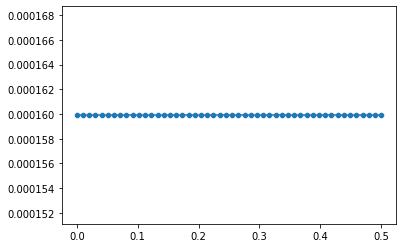

In [84]:
sbn.scatterplot(x=mu,y=Turbulence_measurements_under_control)
sbn.lineplot(x=mu,y=Turbulence_measurements_under_control)

## 2. Complex Hopf model

In [5]:
import HopfModel
importlib.reload(HopfModel)

<module 'HopfModel' from '/home/nartallokalu/Desktop/turbulencecontrol/HopfModel.py'>

In [3]:
#Simulation parameters
#Model parameters
N=1000; T=1000; delta_x=0.1; beta=2.6; sigma=0.1; K=0.05
#Latent parameters
alpha = np.angle(complex(1,beta)); w=beta+1
#Coupling function
def G(x):
    return 0.5*np.exp(-np.abs(x))
#Integration parameters
#phi_0 = np.random.uniform(low=0,high=2*np.pi,size=N)
W_0=np.zeros(N)+10**(-6)
num_points = 10000; t_0=0

In [6]:
sol_CH,t_CH = HopfModel.SolveComplexHopfModel(W_0,T,N,w,G,num_points,t_0,delta_x,alpha,sigma,K,beta)
phi_CH = np.angle(sol_CH) - beta*np.log(np.abs(sol_CH))
bounded_phi_CH = np.mod(phi_CH,2*np.pi)

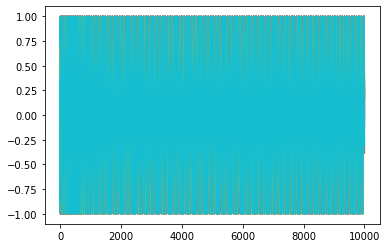

In [7]:
for j in range(0,10):
    sbn.lineplot(np.sin(bounded_phi_CH[j,:]))

<AxesSubplot: >

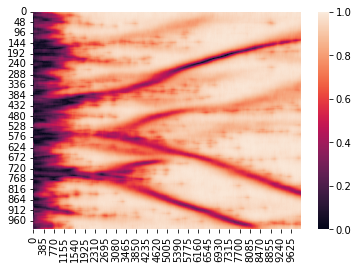

In [8]:
LKO_R_CH,LKO_theta_CH = TB.CalculateLocalKuramotoOrderParam(bounded_phi_CH,G,delta_x)
sbn.heatmap(LKO_R_CH,vmin=0,vmax=1)

## Complex Hopf model with global feedback control

In [9]:
import HopfModelwithcontrol as Hmodel_c

In [10]:
mu=0.05
sol_CH_c,t_CH = Hmodel_c.SolveComplexHopfModelWithControl(W_0,T,N,w,G,num_points,t_0,delta_x,alpha,sigma,K,beta,mu)
phi_CH_c = np.angle(sol_CH_c) - beta*np.log(np.abs(sol_CH_c))
bounded_phi_CH_c = np.mod(phi_CH_c,2*np.pi)

<AxesSubplot: >

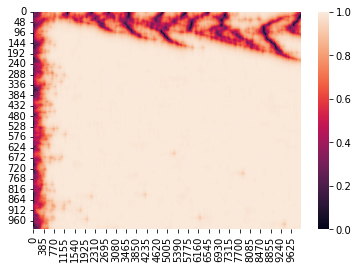

In [11]:
LKO_R_CH_c,LKO_theta_CH_c = TB.CalculateLocalKuramotoOrderParam(bounded_phi_CH_c,G,delta_x)
sbn.heatmap(LKO_R_CH_c,vmin=0,vmax=1)

For that small value of the control, most of the turbulence was mitigated.